In [644]:
# 데이터프레임를 위한 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# 시각화를 위한 모듈 import 
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(color_codes=True)
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False
rc("font", family = "Arial Unicode MS")
%matplotlib inline # 실행을 했을 때 그래프가 바로 나타나게 하는 옵션
get_ipython().run_line_magic("matplotlib","inline")


# 머신러닝을 위한 모듈 import
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

UsageError: unrecognized arguments: # 실행을 했을 때 그래프가 바로 나타나게 하는 옵션


In [645]:
'''
id	선수 고유의 아이디
name	이름
age	나이
continent 	선수들의 국적이 포함되어 있는 대륙
contract_until 	선수의 계약기간 만료
position 	선수가 선호하는 포지션
prefer_foot 	선수가 선호하는 발
reputation 	선수가 유명한 정도
stat_overall 	선수의 현재 능력치
stat_potential 	선수가 경험 및 노력을 통해 발전할 수 있는 정도
stat_skill_moves 	선수의 개인기 능력치
value 	FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)

'''

'\nid\t선수 고유의 아이디\nname\t이름\nage\t나이\ncontinent \t선수들의 국적이 포함되어 있는 대륙\ncontract_until \t선수의 계약기간 만료\nposition \t선수가 선호하는 포지션\nprefer_foot \t선수가 선호하는 발\nreputation \t선수가 유명한 정도\nstat_overall \t선수의 현재 능력치\nstat_potential \t선수가 경험 및 노력을 통해 발전할 수 있는 정도\nstat_skill_moves \t선수의 개인기 능력치\nvalue \tFIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)\n\n'

### Step 1 : 데이터  읽기 및 이해

In [646]:
df = pd.read_csv("FIFA_train.csv")
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0000,94,94,4.0000,110500000.0000
1,3,De Gea,27,europe,2020,GK,right,4.0000,91,93,1.0000,72000000.0000
2,7,L. Suárez,31,south america,2021,ST,right,5.0000,91,91,3.0000,80000000.0000
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0000,91,91,3.0000,51000000.0000
4,9,J. Oblak,25,europe,2021,GK,right,3.0000,90,93,1.0000,68000000.0000


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [648]:
df.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [649]:
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.0000,8932.0000,8932.0000,8932.0000,8932.0000,8932.0000,8932.0000
mean,7966.7758,25.2091,1.1309,67.0911,71.9972,2.4017,2778673.3094
std,4844.4285,4.6355,0.4238,6.8549,5.9881,0.7760,5840981.5211
min,0.0000,16.0000,1.0000,47.0000,48.0000,1.0000,10000.0000
25%,3751.7500,21.0000,1.0000,63.0000,68.0000,2.0000,375000.0000
50%,7696.5000,25.0000,1.0000,67.0000,72.0000,2.0000,825000.0000
75%,12082.2500,28.0000,1.0000,72.0000,76.0000,3.0000,2600000.0000
max,16948.0000,40.0000,5.0000,94.0000,94.0000,5.0000,110500000.0000


### step 2 : 데이터 정제

In [650]:
'''
과연 id를 삭제하는게 맞을까?
'''

df = df.drop(['id'], axis=1)

In [651]:
df.dtypes

name                object 
age                 int64  
continent           object 
contract_until      object 
position            object 
prefer_foot         object 
reputation          float64
stat_overall        int64  
stat_potential      int64  
stat_skill_moves    float64
value               float64
dtype: object

outlir max : 110500000.0 => 1,100억 유로


(8932, 11)

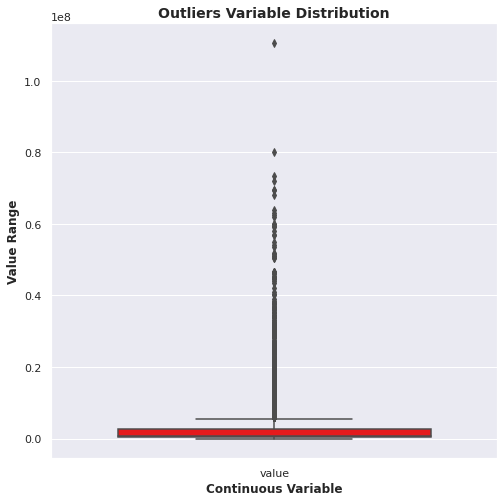

In [652]:
# outlier max값 : 1,100억 유로

outliers = ['value']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Value Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
print(f"outlir max : {df[outliers].max()[0]} => 1,100억 유로")
df.shape

##### 인사이트 :
- outlier들을 이상치라고 할 수 있지만. 제거하지 않고 표준화 스케일링 사용

In [653]:
df['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022            761 
2023            506 
Jun 30, 2019    501 
2018            327 
Dec 31, 2018    64  
May 31, 2019    19  
2024            12  
Jan 31, 2019    10  
Jun 30, 2020    9   
2025            3   
Jan 1, 2019     2   
2026            1   
May 31, 2020    1   
Jan 12, 2019    1   
Name: contract_until, dtype: int64

In [654]:
# 계약기간 만료(contract_until)을 년으로 보기위해서 새로운 column 생성
df['contract_year'] = df['contract_until'].apply(lambda x: x[-4:])
df['contract_year'].value_counts()

2019    2899
2021    2308
2020    2051
2022    761 
2023    506 
2018    391 
2024    12  
2025    3   
2026    1   
Name: contract_year, dtype: int64

In [656]:
# 중복 항목 확인

df.loc[df.duplicated()]

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_year


In [657]:
# 숫자 및 범주형 변수 - 열 분리

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

### step 3 : 데이터 시각화
- 여기서 일부 예측 변수가 결과 변수 가격과 직접적으로 강한 연관성을 가지고 있는지 식별

In [658]:
df.columns

Index(['name', 'age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value', 'contract_year'],
      dtype='object')

Text(0, 0.5, '수')

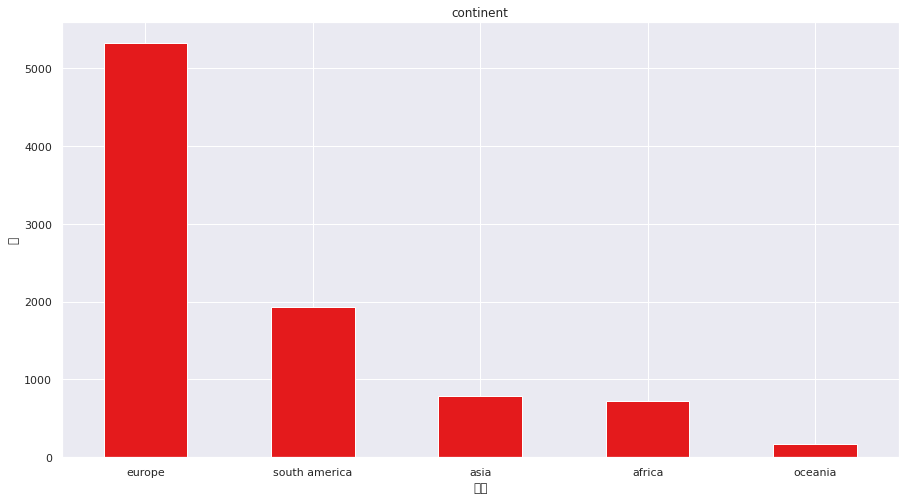

In [659]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df['continent'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('continent')
plt.xlabel("국적",fontweight = 'bold')
plt.xticks(rotation=0)
plt.ylabel("수",fontweight = 'bold')

##### 인사이트:
- 국적이 유럽인 사람들이 많음
- 그에 반해 국적이 오세아니아니 사람은 현저히 낮음

In [660]:
df['value'].astype(int).max()

110500000

<AxesSubplot:title={'center':'Value Distribution Plot'}, xlabel='value', ylabel='Density'>

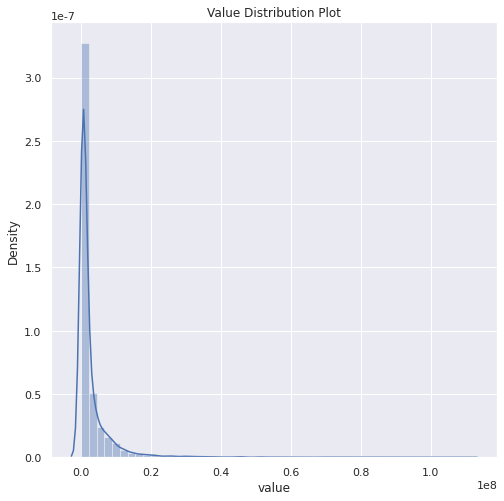

In [661]:
plt.figure(figsize=(8,8))

plt.title('Value Distribution Plot')
sns.distplot(df['value'])

##### 인사이트 :
- 이적료가 대부분 비슷하지만 특정값들이 조금씩 나오는 것을 알 수 있음


##### 숫자형 변수 시각화

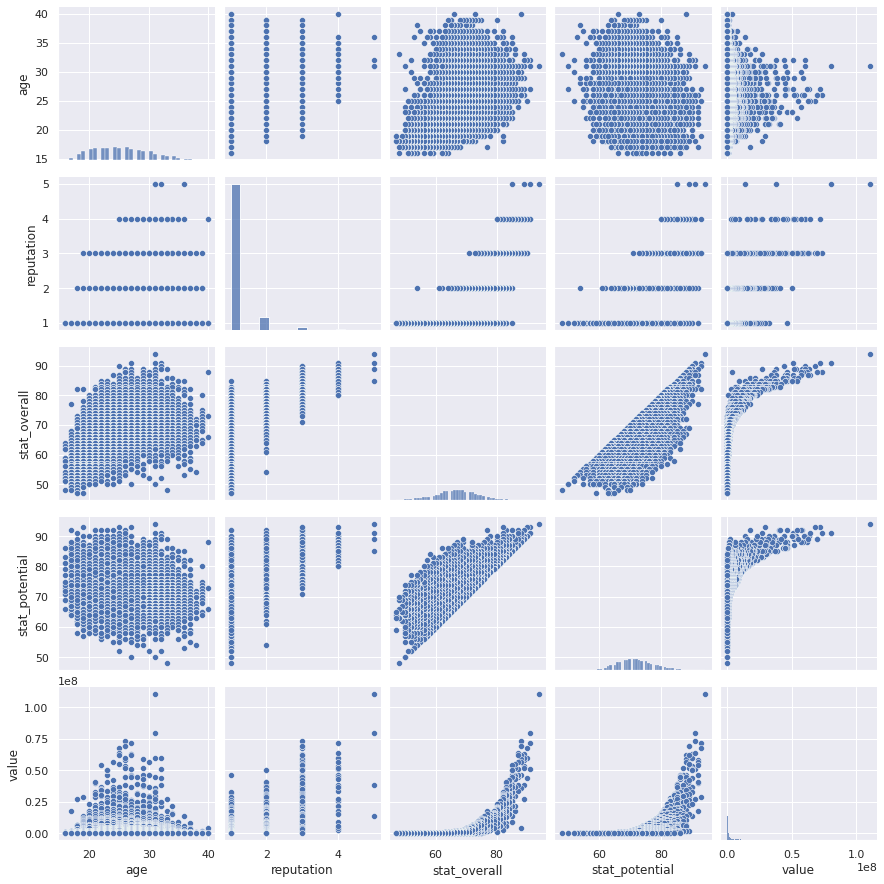

In [662]:
ax = sns.pairplot(df[num_col])

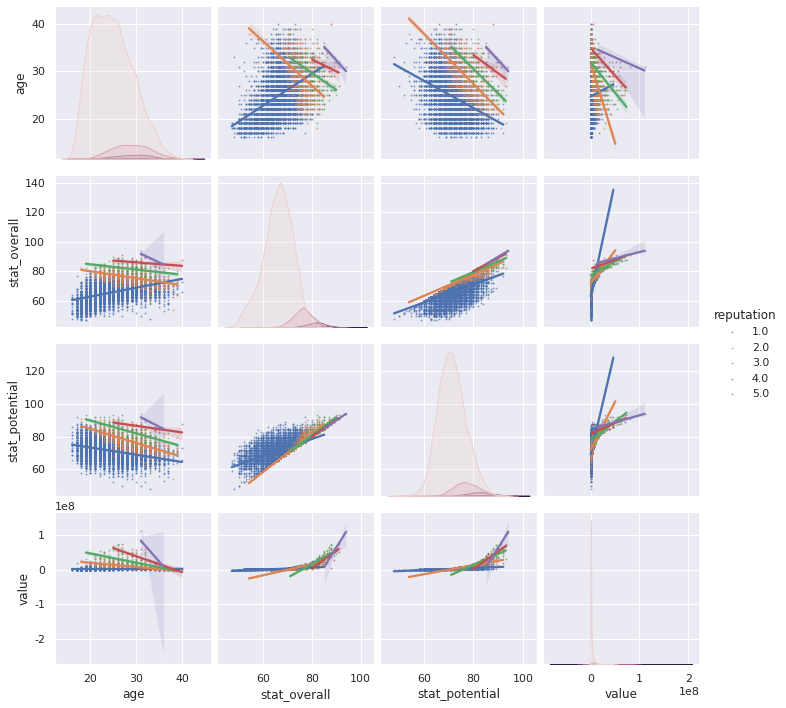

In [663]:
sns.pairplot(df, kind='reg', hue='reputation', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

##### 인사이트:
- 선수의 현재 능력치(stat_overall)은 약 85이후로 상당한 양의 상관관계가 나타남
- 선수의 잠재성(stat_potential)은 약 90이후로 상당한 양의 상관관계가 나타남

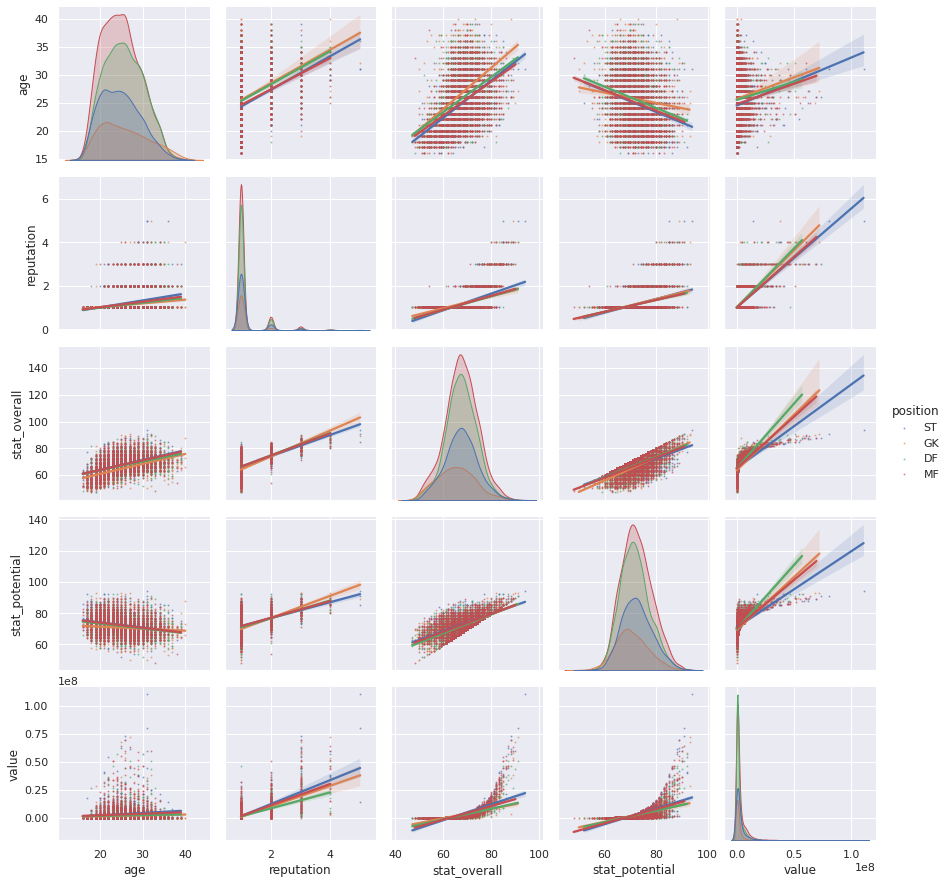

In [664]:
sns.pairplot(df, kind='reg', hue='position', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

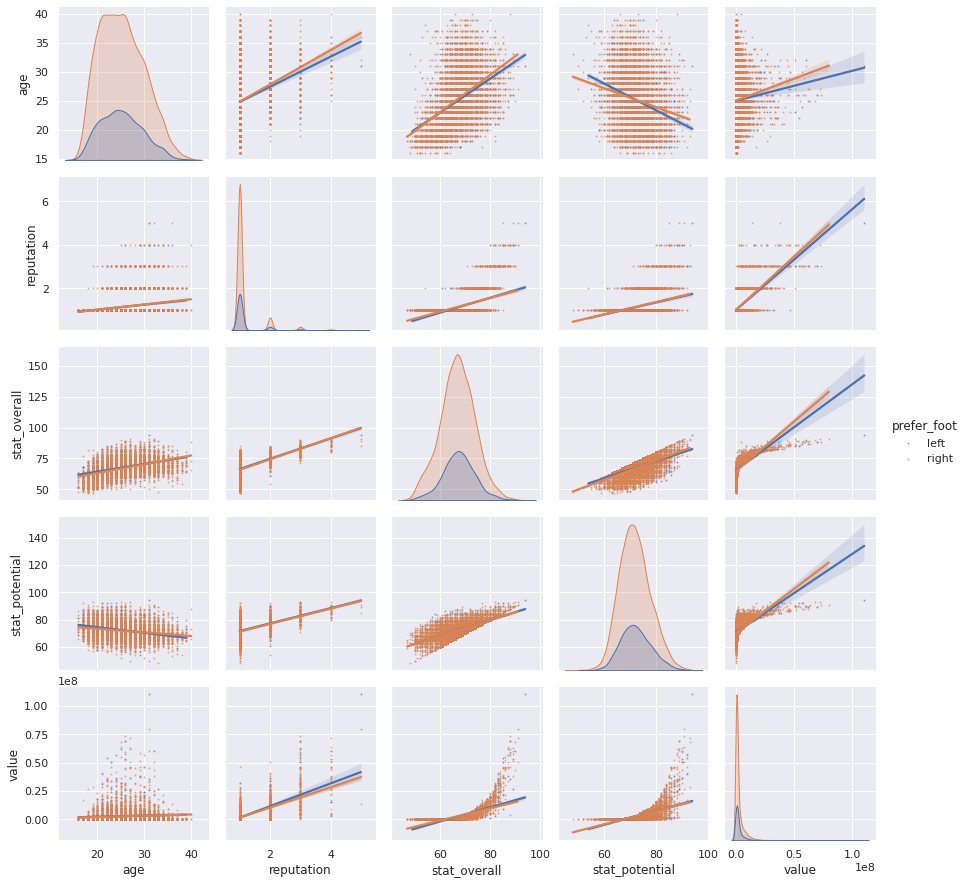

In [665]:
sns.pairplot(df, kind='reg', hue='prefer_foot', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

##### 카테고리 변수들 시각화 :
- boxplot으로 시각화

In [666]:
cat_col

Index(['name', 'continent', 'contract_until', 'position', 'prefer_foot',
       'stat_skill_moves', 'contract_year'],
      dtype='object')

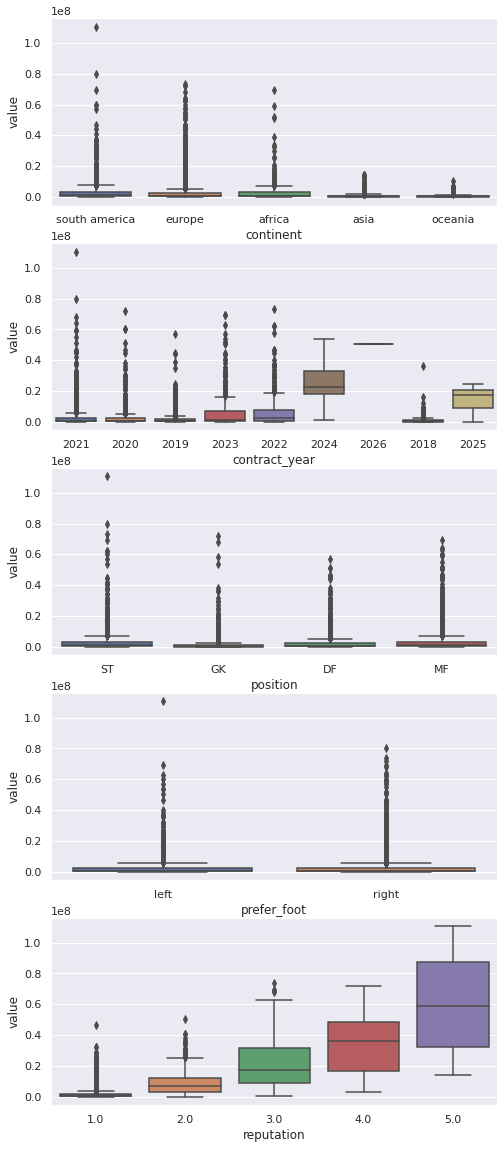

In [667]:
plt.figure(figsize=(8, 20))
plt.subplot(5,1,1)
sns.boxplot(x = 'continent', y = 'value', data = df)
plt.subplot(5,1,2)
sns.boxplot(x = 'contract_year', y = 'value', data = df)
plt.subplot(5,1,3)
sns.boxplot(x = 'position', y = 'value', data = df)
plt.subplot(5,1,4)
sns.boxplot(x = 'prefer_foot', y = 'value', data = df)
plt.subplot(5,1,5)
sns.boxplot(x = 'reputation', y = 'value', data = df)

plt.show()

##### 인사이트 : 
- 선수의 유명한 정도(reputation)가 높을 수록  value값에 영향을 많이 주는 것을 확인
- 계약 만료 기간(contract_year)같은 경우는 데이터의 개수가 많이 차이나서 pass (?)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'europe'),
  Text(1, 0, 'south america'),
  Text(2, 0, 'asia'),
  Text(3, 0, 'africa'),
  Text(4, 0, 'oceania')])

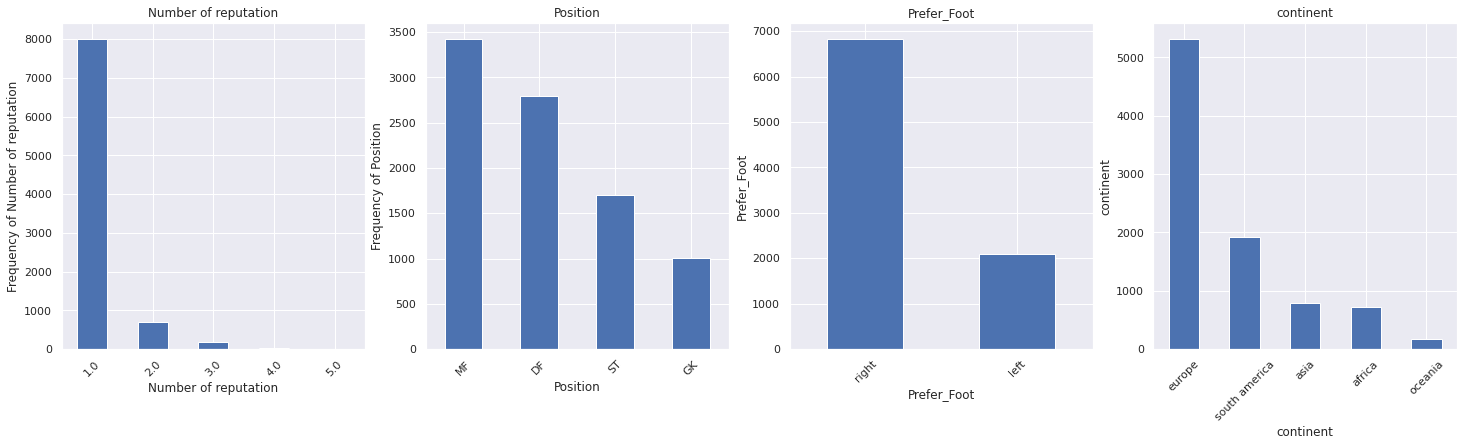

In [668]:
plt.figure(figsize=(25, 6))

plt.subplot(1,4,1)
plt1 = df['reputation'].value_counts().plot(kind='bar')
plt.title('Number of reputation')
plt1.set(xlabel = 'Number of reputation', ylabel='Frequency of Number of reputation')
plt.xticks(rotation=45)

plt.subplot(1,4,2)
plt1 = df['position'].value_counts().plot(kind='bar')
plt.title('Position')
plt1.set(xlabel = 'Position', ylabel='Frequency of Position')
plt.xticks(rotation=45)

plt.subplot(1,4,3)
plt1 = df['prefer_foot'].value_counts().plot(kind='bar')
plt.title('Prefer_Foot')
plt1.set(xlabel = 'Prefer_Foot', ylabel='Prefer_Foot')
plt.xticks(rotation=45)

plt.subplot(1,4,4)
plt1 = df['continent'].value_counts().plot(kind='bar')
plt.title('continent')
plt1.set(xlabel = 'continent', ylabel='continent')
plt.xticks(rotation=45)

##### 인사이트 :
- 데이터 내에서 선수들의 유명한 정도는 대부분이 1인것을 확인
- 데이터 내에서 오른발잡이가 상당수 차지
- 데이터 내에서 상당수가 유럽국적인 것을 확인

##### hue는 prefer_foot으로 주면서 포지션과 value의 관계 비교

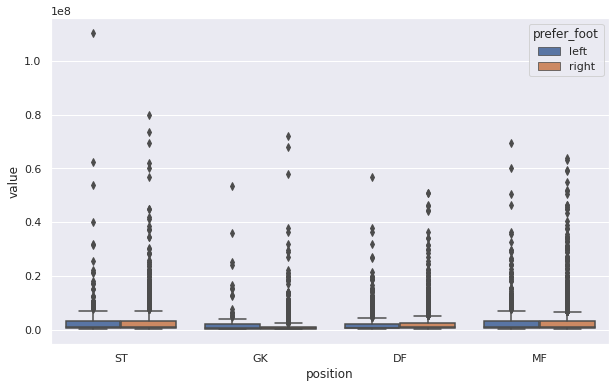

In [669]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'position', y = 'value', hue = 'prefer_foot', data = df)
plt.show()

##### hue는 position으로 유명한 정도와 value를 비교

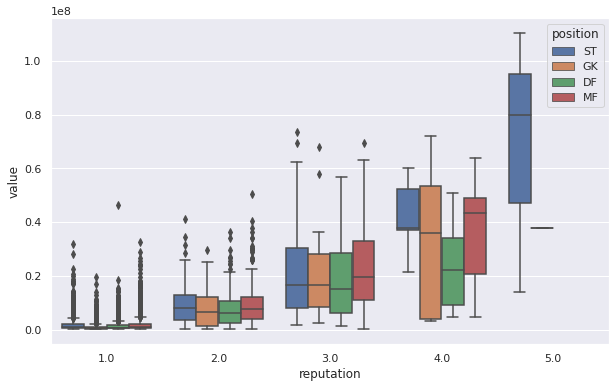

In [670]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'reputation', y = 'value', hue = 'position', data = df)
plt.show()

##### 인사이트 :
- 유명한 정도가 5인 선수들의 상당 수가 Striker임을 알 수 있고 이적료 또한 비싼것을 알 수 있음

<Figure size 1440x432 with 0 Axes>

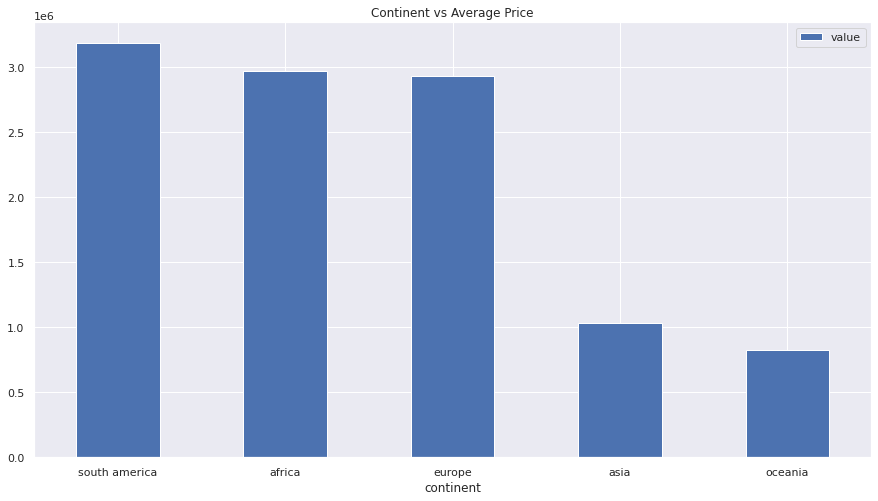

In [671]:
plt.figure(figsize=(20, 6))

dfx = pd.DataFrame(df.groupby(['continent'])['value'].mean().sort_values(ascending = False))
dfx.plot.bar()
plt.title('Continent vs Average Price')
plt.xticks(rotation=0)
plt.show()

##### 인사이트 :
- europe에 사람이 많았음에도 불구하고 value의 평균은 south america, afica, europe이 비슷함

<Figure size 1440x432 with 0 Axes>

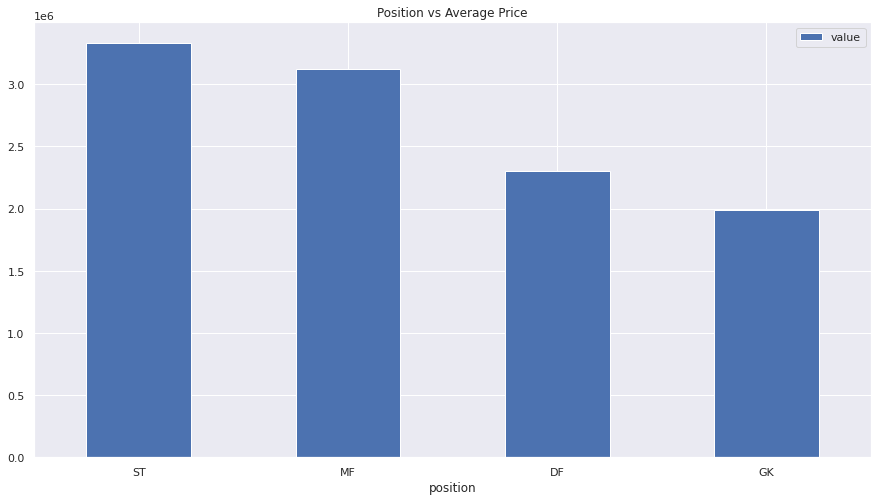

In [672]:
plt.figure(figsize=(20, 6))

dfx = pd.DataFrame(df.groupby(['position'])['value'].mean().sort_values(ascending = False))
dfx.plot.bar()
plt.title('Position vs Average Price')
plt.xticks(rotation=0)
plt.show()

##### 인사이트 :
- striker의 value_counts()는 3번째였지만, value의 평균은 제일 높은것으로 보아 striker들의 이적료가 높을것으로 확인

<Figure size 1440x432 with 0 Axes>

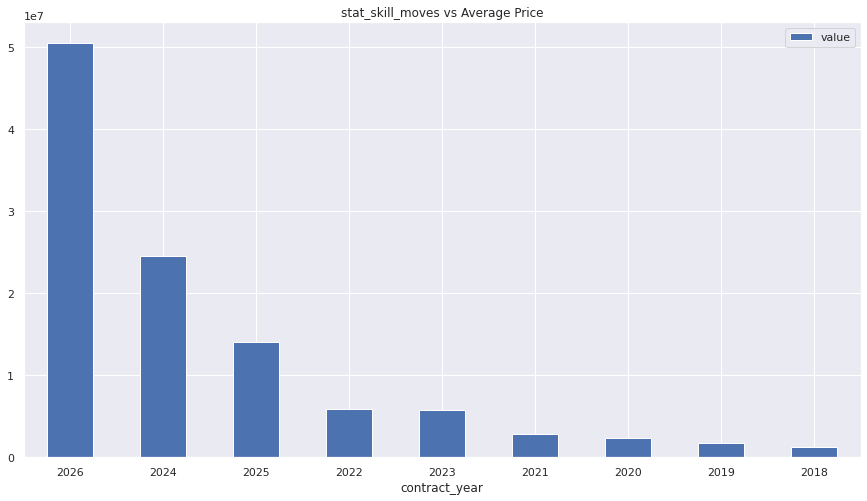

In [673]:
plt.figure(figsize=(20, 6))

dfx = pd.DataFrame(df.groupby(['contract_year'])['value'].mean().sort_values(ascending = False))
dfx.plot.bar()
plt.title('stat_skill_moves vs Average Price')
plt.xticks(rotation=0)
plt.show()

In [674]:
df['contract_year'].value_counts()

2019    2899
2021    2308
2020    2051
2022    761 
2023    506 
2018    391 
2024    12  
2025    3   
2026    1   
Name: contract_year, dtype: int64

##### 인사이트 :
- contract_year(계약 만료 년도)는 크게 상관 없을것으로 확인
- 이유 : 상위권인 3개의 데이터는 데이터 건수가 너무 적음

<Figure size 1440x432 with 0 Axes>

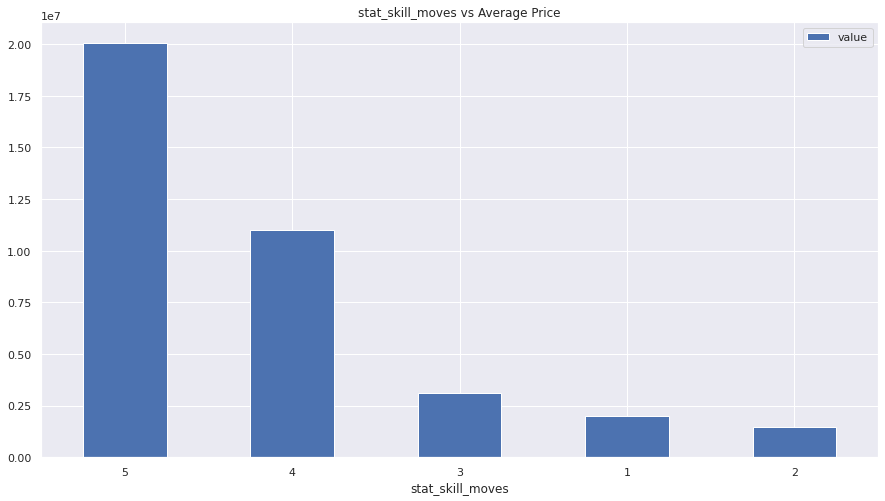

In [752]:
plt.figure(figsize=(20, 6))

dfx = pd.DataFrame(df.groupby(['stat_skill_moves'])['value'].mean().sort_values(ascending = False))
dfx.plot.bar()
plt.title('stat_skill_moves vs Average Price')
plt.xticks(rotation=0)
plt.show()

##### 인사이트 :
- 개인기 능력치의 평균이 5와 4일때 value값에 영향을 많이줌

<Figure size 1440x432 with 0 Axes>

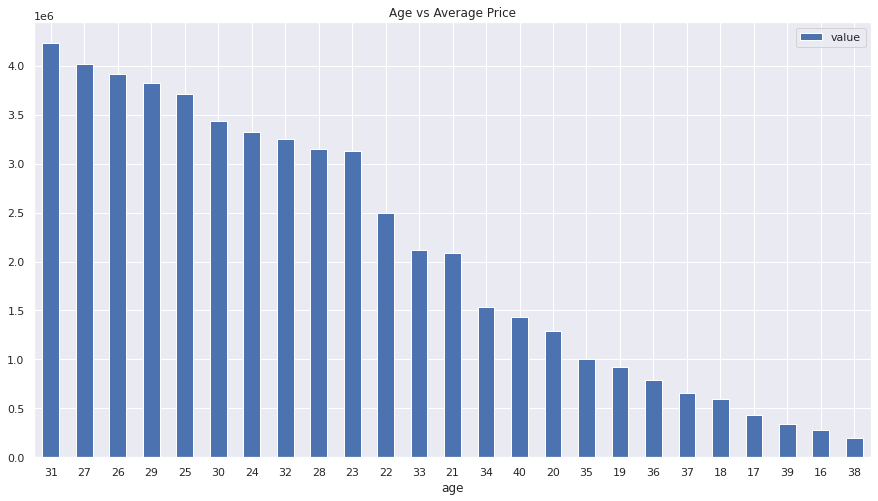

In [676]:
plt.figure(figsize=(20, 6))

dfx = pd.DataFrame(df.groupby(['age'])['value'].mean().sort_values(ascending = False))
dfx.plot.bar()
plt.title('Age vs Average Price')
plt.xticks(rotation=0)
plt.show()k

In [677]:
len(df['age'].unique())

25

In [678]:
df['age'].dtype

dtype('int64')

##### 인사이트 : 
- 상위 9개가 23~32내에 있는 것으로 보아 age별 value의 평균으로 3분류로 나눠서 하면 value와 상관관계가 있을것으로 확인

In [679]:
# 16~23 => 전성기 전(8)
# 24~31 => 전성기 (8)
# 31~40 => 전성기 후(9)


df['value'] = df['value'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['age'])['value'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='age')
df_temp
bins = [50000,1600000,2700000,4500000]
label =[0,1,2]
df['age_Category'] = pd.cut(df_temp['value_y'],bins,right=False,labels=label)
df.head()

# df_temp = df.copy()
# t = df_temp.groupby(['age'])['value'].mean().astype(int)
# df_temp = df_temp.merge(t.reset_index(), how='left',on='age')

# df.loc[(df.groupby(['age'])['value'].mean().astype(int) > 195882) & (df.groupby(['age'])['value'].mean().astype(int) <= 1100000), 'age_category'] = "전성기 전"
# df.loc[(df.groupby(['age'])['value'].mean().astype(int) > 1100000) & (df.groupby(['age'])['value'].mean().astype(int) <= 3200000), 'age_category'] = "전성기"
# df.loc[df.groupby(['age'])['value'].mean().astype(int) > 3200000, 'age_category'] = "전성기 후"

# df.head()

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_year,age_Category
0,L. Messi,31,south america,2021,ST,left,5.0000,94,94,4.0,110500000,2021,2
1,De Gea,27,europe,2020,GK,right,4.0000,91,93,1.0,72000000,2020,2
2,L. Suárez,31,south america,2021,ST,right,5.0000,91,91,3.0,80000000,2021,2
3,Sergio Ramos,32,europe,2020,DF,right,4.0000,91,91,3.0,51000000,2020,2
4,J. Oblak,25,europe,2021,GK,right,3.0000,90,93,1.0,68000000,2021,2


##### 시각화 후 중요 변수들:
- reputation(유명한 정도), age(나이)
- stat_overall(현재 능력치), stat_potential(잠재성), stat_skill_moves(개인기 능력치)
- position(포지션)

In [680]:
# 중요 변수들

sig_col = ['reputation','stat_overall','stat_potential','stat_skill_moves','age_Category','position','value']

In [681]:
df = df[sig_col]

In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   reputation        8932 non-null   float64 
 1   stat_overall      8932 non-null   int64   
 2   stat_potential    8932 non-null   int64   
 3   stat_skill_moves  8932 non-null   object  
 4   age_Category      8932 non-null   category
 5   position          8932 non-null   object  
 6   value             8932 non-null   int32   
dtypes: category(1), float64(1), int32(1), int64(2), object(2)
memory usage: 392.8+ KB


### Step 4 : 데이터 준비

In [683]:
sig_cat_col = ['age_Category','position']

In [684]:
# 더미화

dummies = pd.get_dummies(df[sig_cat_col])
dummies.shape

(8932, 7)

In [685]:
dummies = pd.get_dummies(df[sig_cat_col], drop_first=True)
dummies.shape

(8932, 5)

In [686]:
df = pd.concat([df, dummies], axis = 1).drop(['age_Category','position'], axis=1)
df

,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_Category_1,age_Category_2,position_GK,position_MF,position_ST
0,5.0000,94,94,4.0,110500000,0,1,0,0,1
1,4.0000,91,93,1.0,72000000,0,1,1,0,0
2,5.0000,91,91,3.0,80000000,0,1,0,0,1
3,4.0000,91,91,3.0,51000000,0,1,0,0,0
4,3.0000,90,93,1.0,68000000,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8927,1.0000,48,63,3.0,60000,0,0,0,1,0
8928,1.0000,47,59,2.0,40000,0,0,0,0,0
8929,1.0000,47,64,2.0,50000,0,0,0,0,0
8930,1.0000,47,65,1.0,50000,0,0,1,0,0


In [690]:
df['stat_skill_moves'] = df['stat_skill_moves'].astype(float).astype(int)

### Step 5 : train데이터셋과 test데이터 셋으로 분리

In [691]:
df['stat_overall_85'] = np.where(df['stat_overall'] >= 85,1,0)
df['stat_potential_90'] = np.where(df['stat_potential'] >= 90, 1 ,0)

In [692]:
# 훈련 데이터 세트와 데이터 세트가 동일한 행을 갖도록 지정
# 70/30 비율로 나눔
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [693]:
df_train.head()

,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_Category_1,age_Category_2,position_GK,position_MF,position_ST,stat_overall_85,stat_potential_90
3684,1.0000,69,70,3,1200000,0,1,0,1,0,0,0
949,1.0000,75,75,2,2700000,1,0,0,1,0,0,0
5423,1.0000,65,74,2,725000,1,0,0,1,0,0,0
7296,1.0000,61,72,2,375000,0,0,0,0,0,0,0
5507,2.0000,65,68,3,675000,0,1,0,1,0,0,0


In [694]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [695]:
sig_num_col = ['stat_overall','stat_potential']

In [696]:
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])
df_train.head()

,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_Category_1,age_Category_2,position_GK,position_MF,position_ST,stat_overall_85,stat_potential_90
3684,1.0000,0.5000,0.4651,3,1200000,0,1,0,1,0,0,0
949,1.0000,0.6364,0.5814,2,2700000,1,0,0,1,0,0,0
5423,1.0000,0.4091,0.5581,2,725000,1,0,0,1,0,0,0
7296,1.0000,0.3182,0.5116,2,375000,0,0,0,0,0,0,0
5507,2.0000,0.4091,0.4186,3,675000,0,1,0,1,0,0,0


In [697]:
df_test

,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_Category_1,age_Category_2,position_GK,position_MF,position_ST,stat_overall_85,stat_potential_90
7843,1.0000,59,68,2,240000,1,0,0,0,1,0,0
833,2.0000,76,86,3,12500000,1,0,0,0,1,0,0
2506,1.0000,71,71,3,2200000,0,1,0,1,0,0,0
2670,2.0000,71,71,3,900000,1,0,0,0,0,0,0
7231,1.0000,61,70,3,400000,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7266,1.0000,61,73,2,400000,1,0,0,1,0,0,0
475,1.0000,78,81,3,10500000,0,1,0,0,0,0,0
2096,1.0000,72,76,3,4000000,0,1,0,1,0,0,0
3630,1.0000,69,74,3,1400000,0,1,0,0,1,0,0


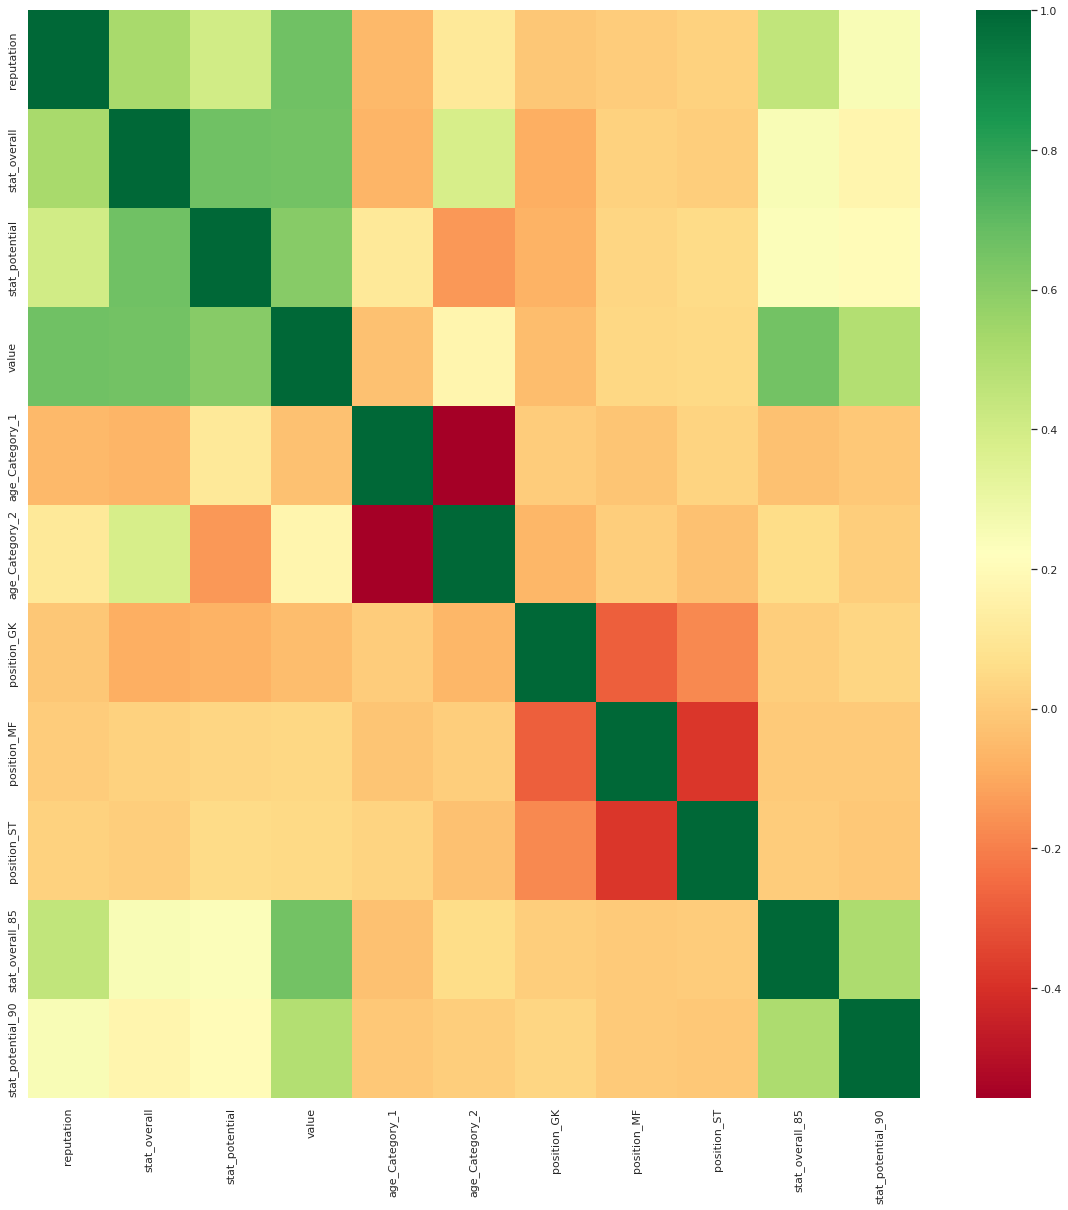

In [536]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

In [698]:
df_train.corr()

,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_Category_1,age_Category_2,position_GK,position_MF,position_ST,stat_overall_85,stat_potential_90
reputation,1.0000,0.5198,0.3986,0.1898,0.6648,-0.0555,0.1065,-0.0104,0.0045,0.0255,0.4471,0.2464
stat_overall,0.5198,1.0000,0.6621,0.3906,0.6548,-0.0697,0.3855,-0.0877,0.0209,0.0122,0.2494,0.1721
stat_potential,0.3986,0.6621,1.0000,0.3222,0.6091,0.1104,-0.1396,-0.0733,0.0338,0.0523,0.2341,0.1973
stat_skill_moves,0.1898,0.3906,0.3222,1.0000,0.2919,-0.0047,0.1344,-0.6459,0.3533,0.2434,0.0578,0.0152
value,0.6648,0.6548,0.6091,0.2919,1.0000,-0.0334,0.1708,-0.0412,0.0418,0.0469,0.6553,0.4947
age_Category_1,-0.0555,-0.0697,0.1104,-0.0047,-0.0334,1.0000,-0.5574,0.0051,-0.0169,0.0269,-0.0341,-0.0075
age_Category_2,0.1065,0.3855,-0.1396,0.1344,0.1708,-0.5574,1.0000,-0.0640,0.0112,-0.0287,0.0624,0.0135
position_GK,-0.0104,-0.0877,-0.0733,-0.6459,-0.0412,0.0051,-0.0640,1.0000,-0.2807,-0.1756,0.0105,0.0348
position_MF,0.0045,0.0209,0.0338,0.3533,0.0418,-0.0169,0.0112,-0.2807,1.0000,-0.3848,0.0019,-0.0007
position_ST,0.0255,0.0122,0.0523,0.2434,0.0469,0.0269,-0.0287,-0.1756,-0.3848,1.0000,0.0051,-0.0043


In [699]:
# X = df_train.drop('value',axis=1)
# y = df_train.loc[:,'value']

In [700]:
# X_train, X_test, y_train, y_test = train_test_split(
# X,y)

In [701]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)

In [702]:
y_train = df_train.pop('value')
X_train = df_train

In [703]:
print(X_train.shape, y_train.shape)

(6252, 11) (6252,)


In [704]:
X_train.columns

Index(['reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'age_Category_1', 'age_Category_2', 'position_GK', 'position_MF',
       'position_ST', 'stat_overall_85', 'stat_potential_90'],
      dtype='object')

### step 6 : Linear Model 구축

In [705]:
import statsmodels.api as sm

In [706]:
X_train_1 = X_train['stat_overall']

In [707]:
X_train_1c = sm.add_constant(X_train_1)

lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [708]:
lr_1.params

const          -8588640.1006
stat_overall   24889525.2693
dtype: float64

In [709]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     4691.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:30:36   Log-Likelihood:            -1.0459e+05
No. Observations:                6252   AIC:                         2.092e+05
Df Residuals:                    6250   BIC:                         2.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.589e+06   1.75e+05    -49.039   

In [710]:
y_train

3684    1200000 
949     2700000 
5423    725000  
7296    375000  
5507    675000  
         ...    
350     14500000
79      27000000
8039    230000  
6936    240000  
5640    725000  
Name: value, Length: 6252, dtype: int32

##### 인사이트:
- start_overall의 p-value가 0.005이하 이기 때문에 변수 사용

In [711]:
X_train_2 = X_train[['stat_overall', 'stat_potential']]

In [712]:
# 상수항 추가
X_train_2c = sm.add_constant(X_train_2)

# 두번째 적정 모델 생성
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [713]:
lr_2.params

const            -11806725.5283
stat_overall     17020778.9445 
stat_potential   13298627.4785 
dtype: float64

In [714]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2927.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:30:38   Log-Likelihood:            -1.0427e+05
No. Observations:                6252   AIC:                         2.085e+05
Df Residuals:                    6249   BIC:                         2.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.181e+07   2.08e+05    -56.

##### 인사이트 :
- 이또한 p-value값이 0.005이하 이기 때문에 사용

In [715]:
X_train_3 = X_train[['stat_overall', 'stat_potential','reputation']]

In [716]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [717]:
lr_3.params

const            -14300754.8842
stat_overall     9672950.3883  
stat_potential   11548825.8281 
reputation       5972006.2497  
dtype: float64

In [718]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     3314.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:30:42   Log-Likelihood:            -1.0336e+05
No. Observations:                6252   AIC:                         2.067e+05
Df Residuals:                    6248   BIC:                         2.068e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.43e+07   1.88e+05    -76.

In [719]:
X_train_4 = X_train[['stat_overall', 'stat_potential','reputation','stat_skill_moves']]

In [720]:
# Add a constant
X_train_4c = sm.add_constant(X_train_4)

# Create a third fitted model
lr_4 = sm.OLS(y_train, X_train_4c).fit()

In [721]:
lr_4.params

const              -14606976.1484
stat_overall       9309204.6898  
stat_potential     11404850.1424 
reputation         5982992.6041  
stat_skill_moves   222844.4382   
dtype: float64

In [722]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2493.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:30:51   Log-Likelihood:            -1.0336e+05
No. Observations:                6252   AIC:                         2.067e+05
Df Residuals:                    6247   BIC:                         2.068e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.461e+07   2.08e+05  

##### RFE

In [723]:
from sklearn.feature_selection import RFE

In [724]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15) # RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [725]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('reputation', True, 1),
 ('stat_overall', True, 1),
 ('stat_potential', True, 1),
 ('stat_skill_moves', True, 1),
 ('age_Category_1', True, 1),
 ('age_Category_2', True, 1),
 ('position_GK', True, 1),
 ('position_MF', True, 1),
 ('position_ST', True, 1),
 ('stat_overall_85', True, 1),
 ('stat_potential_90', True, 1)]

In [726]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [727]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'age_Category_1', 'age_Category_2', 'position_GK', 'position_MF',
       'position_ST', 'stat_overall_85', 'stat_potential_90'],
      dtype='object')

In [728]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

In [729]:
X_train.head()

,reputation,stat_overall,stat_potential,stat_skill_moves,age_Category_1,age_Category_2,position_GK,position_MF,position_ST,stat_overall_85,stat_potential_90
3684,1.0000,0.5000,0.4651,3,0,1,0,1,0,0,0
949,1.0000,0.6364,0.5814,2,1,0,0,1,0,0,0
5423,1.0000,0.4091,0.5581,2,1,0,0,1,0,0,0
7296,1.0000,0.3182,0.5116,2,0,0,0,0,0,0,0
5507,2.0000,0.4091,0.4186,3,0,1,0,1,0,0,0


In [730]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     2125.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:31:24   Log-Likelihood:            -1.0147e+05
No. Observations:                6252   AIC:                         2.030e+05
Df Residuals:                    6240   BIC:                         2.030e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.288e+07   2.02e+0

In [731]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stat_overall,33.6200
2,stat_potential,30.5000
3,stat_skill_moves,22.1300
0,reputation,12.2500
5,age_Category_2,5.4600
7,position_MF,2.6600
8,position_ST,1.8800
4,age_Category_1,1.7700
6,position_GK,1.6600
9,stat_overall_85,1.5400


In [732]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('position_GK', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     2317.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:31:29   Log-Likelihood:            -1.0149e+05
No. Observations:                6252   AIC:                         2.030e+05
Df Residuals:                    6241   BIC:                         2.031e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.229e+07   1.82e+0

In [733]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stat_overall,33.5300
2,stat_potential,27.3700
3,stat_skill_moves,17.3800
0,reputation,11.7200
5,age_Category_2,5.2600
6,position_MF,2.6500
7,position_ST,1.8800
4,age_Category_1,1.7400
8,stat_overall_85,1.5200
9,stat_potential_90,1.3700


In [736]:
y_train_price = lm_rfe1.predict(X_train_rfe1c)

In [734]:
# Dropping highly correlated variables and insignificant variables

# X_train_rfe2 = X_train_rfe1.drop('stat_skill_moves_2.0', 1,)

# # Adding a constant variable and Build a third fitted model

# X_train_rfe2c = sm.add_constant(X_train_rfe2)
# lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

# #Summary of linear model
# print(lm_rfe2.summary())

KeyError: "['stat_skill_moves_2.0'] not found in axis"

In [735]:
# # Predicting the price of training set.
# y_train_price = lm_rfe2.predict(X_train_rfe2c)

Text(0.5, 0, 'Errors')

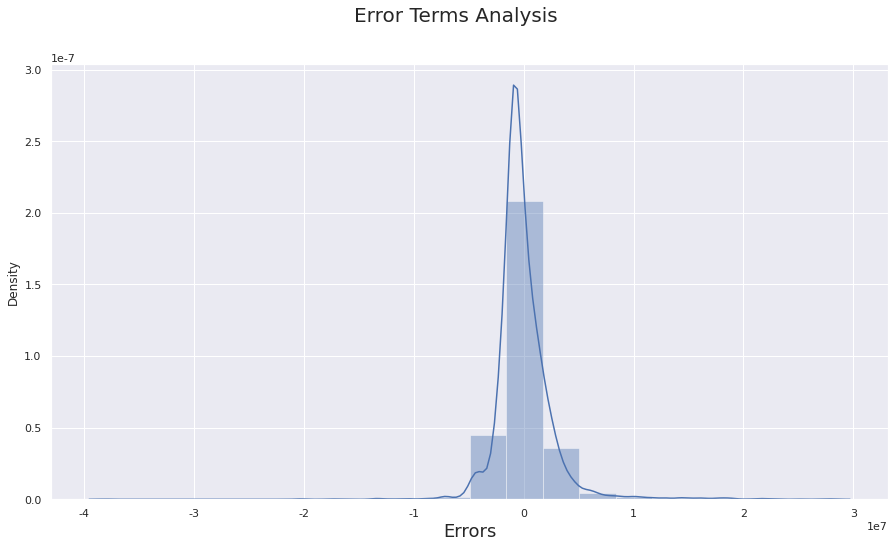

In [737]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [738]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(2680, 12)

In [739]:
y_test = df_test.pop('value')
X_test = df_test

In [741]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe1c.columns]

In [742]:
# Making predictions using the final model
y_pred = lm_rfe1.predict(X_test_new)

Text(0, 0.5, 'y_pred')

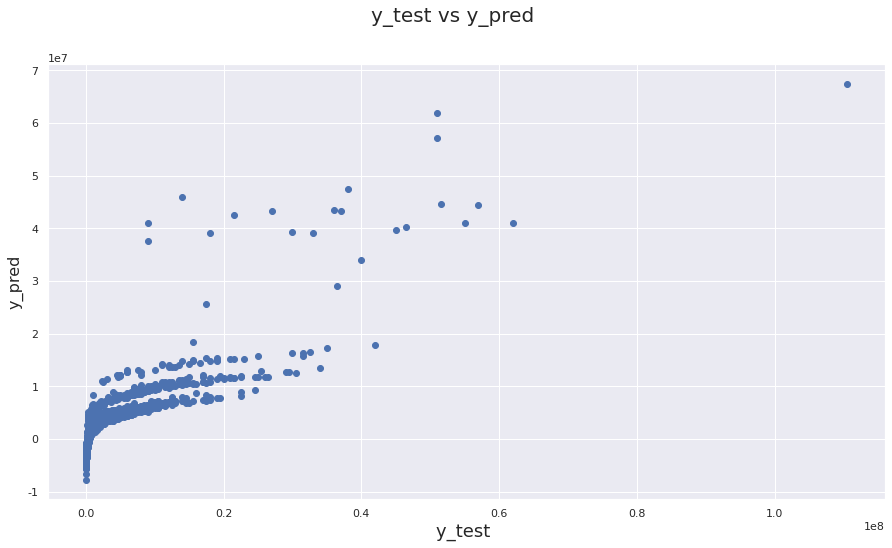

In [743]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [744]:
from sklearn.metrics import r2_score


r2_score(y_test, y_pred)

0.7354552044883375

In [745]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

print("mae : " ,mean_absolute_error(y_test, y_pred))
print("mse : " ,mean_squared_error(y_test, y_pred))
print("rmse : " ,np.sqrt(mean_squared_error(y_test, y_pred)))

mae :  1668802.7445392318
mse :  8630063243086.279
rmse :  2937696.9283924233


In [475]:
lm_rfe2

In [746]:
y_train_price = lm_rfe2.predict(X_train_rfe2c)

In [747]:
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2139.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:33:47   Log-Likelihood:            -1.0124e+05
No. Observations:                6252   AIC:                         2.025e+05
Df Residuals:                    6239   BIC:                         2.026e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.122e+07 

In [748]:
last_col = ['stat_overall','stat_potential','reputation_2.0','reputation_3.0','reputation_4.0','reputation_5.0','stat_skill_moves_3.0','stat_skill_moves_4.0','stat_skill_moves_5.0','age_Category_1','age_Category_2','stat_overall_85','stat_potential_90']

In [750]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=100)

In [751]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.7541635294012318

In [ ]:
print("mae : " ,mean_absolute_error(y_test, pred))
print("mse : " ,mean_squared_error(y_test, pred))
print("rmse : " ,np.sqrt(mean_squared_error(y_test, pred)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 521, n_estimators = 150)

rf_pred = np.zeros((y_test.shape[0]))
rmse_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])

    rmse = np.sqrt(mean_squared_error(np.expm1(val_y), pred))
    rmse_list.append(rmse)
    
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(y_test)]) / 10
    rf_pred += sub_pred
print(f'{rf.__class__.__name__}의 10fold 평균 RMSE는 {np.mean(rmse_list)}')